<h1>Capital Bikeshare Analytic Report and Research Proposal</h1>

<p>The purpose of this project is to analyze the affect of weather on Capitol Bikeshare ridership.</p>
<p>Data Source: https://www.kaggle.com/marklvl/bike-sharing-dataset</p>

<p>Descibe data
-capital bikeshare in DC
-data from 2011 and 2012 and corresponding weather data
why is it interesting? I live in DC.  Bikeshare is a very popular way to get around but can be very affected by the weather. my theory = rainy and snowy days have less rides.  summer has the most</p>

<ol>
    <h3>What can we determine from the data?</h3>
    <li>difference in years?</li>
        <li>To what degree does weather affect bikeshare usage?</li>
    <li>temperature vs rain vs snow???</li>
        <li>Does season affect bikeshare usage?</li>
        <li>How does bikeshare use vary based on time of day?</li>
        <li>Do ridership trends vary based on type of membership?</li>
        <li>What would be a valuable direction for further investigation?</li>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 10.0]
plt.rcParams.update({'font.size': 22})

In [2]:
df = pd.read_csv('day.csv')

In [3]:
#view column names
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#rename columns
df = df.rename(columns={'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'total_rides'})

#set categorical variables
##why set as categories??
df['season'] = df['season'].astype('category')
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = pd.to_numeric(df['weekday'], errors='coerce')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant        731 non-null int64
datetime       731 non-null object
season         731 non-null category
year           731 non-null category
month          731 non-null category
holiday        731 non-null category
weekday        731 non-null int64
workingday     731 non-null category
weather        731 non-null category
temp           731 non-null float64
atemp          731 non-null float64
humidity       731 non-null float64
windspeed      731 non-null float64
casual         731 non-null int64
registered     731 non-null int64
total_rides    731 non-null int64
dtypes: category(6), float64(4), int64(5), object(1)
memory usage: 62.4+ KB


In [7]:
df.head(10)

,instant,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [8]:
#view summary stats of numeric variables
df.describe()

,instant,weekday,temp,atemp,humidity,windspeed,casual,registered,total_rides
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.997264,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,2.004787,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,5.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,6.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#updating column values with more readable values

weekdays = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df['weekday'] = df['weekday'].map(weekdays)

months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6: 'June',
          7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'DEcember'}
df['month'] = df['month'].map(months)

seasons = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
df['season'] = df['season'].map(seasons)

df['year'] = df['year'].map({0:2011, 1:2012})

##how do I un-normalize the temp??

df.head()


,instant,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


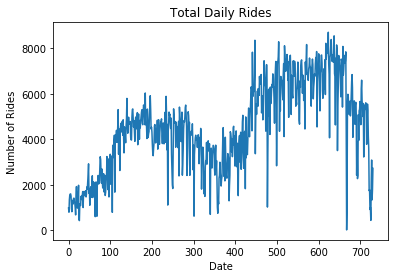

In [10]:
plt.plot(df['total_rides'])
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Total Daily Rides')
plt.show()

<function matplotlib.pyplot.show>

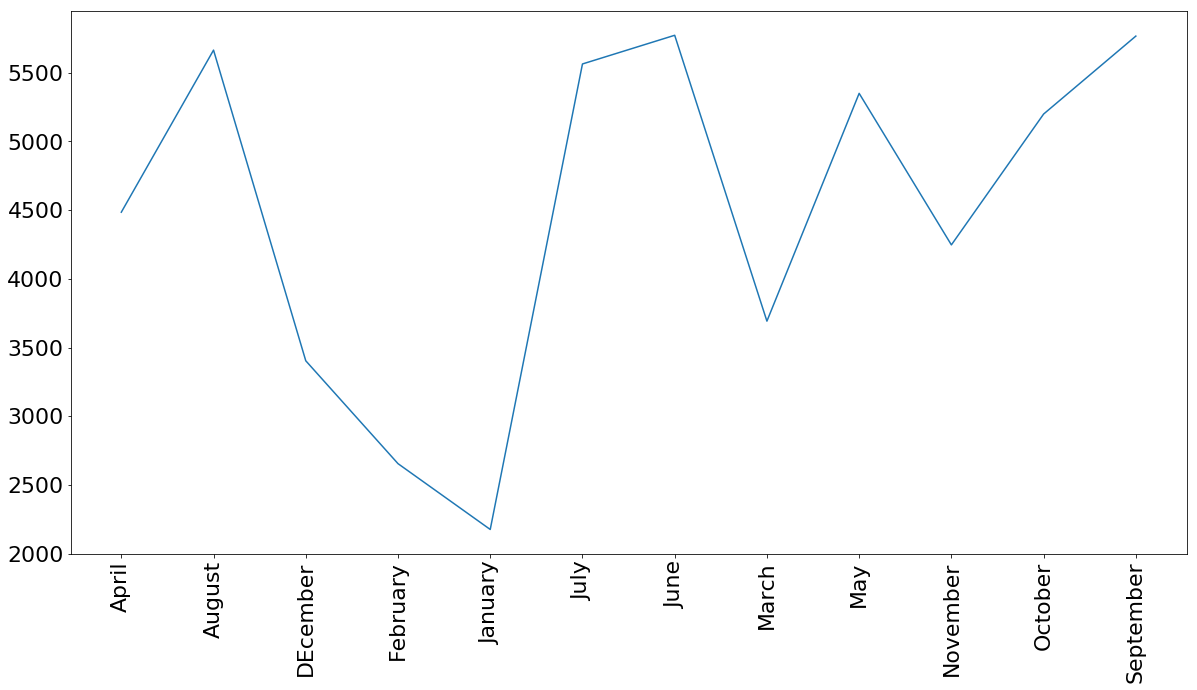

In [25]:
#Does season affect bikeshare ridership?

#sum rides based on month

month_rides = df.groupby(['month'])['total_rides'].mean()
plt.plot(month_rides)
plt.xticks(rotation=90)
plt.show

#in alphabetical order :( ...so that's why they had everything as numbers?  best practice?

#do I have to use matplot ...is it ok to use seaborn or am i supposed to stick with whats been shown in the prep course?

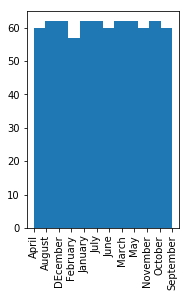

In [11]:
plt.subplot(121)
plt.hist(df['month'], bins=12)
plt.xticks(rotation=90)
plt.show()

<h3>What would be a valuable direction for further investigation?</h3>

<ul>
    <li>newer data?</li>
    <li>events affect usage? presidential election? baseball games?</li>
    <li>duration of trips - affected by weather?</li>
    <li>most popular stations?</li>
    <li>compare to uber/lyft?</li>
</ul>